#**Trabalhando com planilhas do Excel**


In [ ]:
#Importando a biblioteca
import pandas as pd

In [ ]:
#Leitura de arquivos
df1 = pd.read_excel("/Pandas_DIO/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/Pandas_DIO/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/Pandas_DIO/datasets/Natal.xlsx")
df4 = pd.read_excel("/Pandas_DIO/datasets/Recife.xlsx")
df5 = pd.read_excel("/Pandas_DIO/datasets/Salvador.xlsx")

In [ ]:
#Concatenando os Dataframes
df = pd.concat([df1, df2, df3, df4, df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Verificando tipo dos dados
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando datatype de uma coluna
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
#Somando o numero de valores nulos por coluna
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo nulos de uma coluna pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
#Substituindo por 0
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Excluindo nulos do dataframe
df.dropna(inplace=True)

In [ ]:
#Excluindo linhas de um subset(coluna)
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Exclui todas as linhas nulas
df.dropna(how="all", inplace=True)

In [ ]:
#Criando nova coluna(subset) de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Achando a quantidade de produtos vendidos(Exemplo de nova coluna)
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Maior valor de uma coluna
df["Receita"].max()
#Menor valor de uma coluna
df["Receita"].min()

3.34

In [ ]:
#Buscar maiores informações
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#Buscar menores informações
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


#**Trabalhando com datas**


In [ ]:
df["Data"] = df["Data"].astype("int64")

In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
#Transformando coluna de Data de outro formato para data
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
#Agrupando por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando coluna de ano
df["Ano_venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
17,Aracaju,2018-01-01,162.19,1522,9,1459.71,9.0,2018
178,Salvador,2019-01-02,39.28,1037,3,117.84,3.0,2019
12,Recife,2019-01-01,17.48,982,2,34.96,2.0,2019
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,1.0,2019
64,Aracaju,2018-01-01,21.00,1523,5,105.00,5.0,2018


In [ ]:
#Criando coluna de mes e dia na mesma linha de código
df["mes_venda"], df["dia_venda"] = df["Data"].dt.month, df["Data"].dt.day
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda
108,Salvador,2019-03-02,11.72,1037,1,11.72,1.0,2019,3,2
34,Aracaju,2018-01-01,38.25,1521,6,229.50,6.0,2018,1,1
28,Fortaleza,2019-01-01,34.88,1004,3,104.64,3.0,2019,1,1
17,Fortaleza,2019-01-01,166.80,1004,1,166.80,1.0,2019,1,1
66,Salvador,2019-01-01,70.20,1035,3,210.60,3.0,2019,1,1


In [ ]:
#Capturando o minimo de data
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Criando coluna calculando a diferença de dias
df["diferenca_dias"] = df["dia_venda"] - df["dia_venda"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias
219,Salvador,2019-01-02,19.67,1037,2,39.34,2.0,2019,1,2,1
114,Natal,2019-01-02,25.52,1034,1,25.52,1.0,2019,1,2,1
12,Recife,2019-01-01,17.48,982,2,34.96,2.0,2019,1,1,0
31,Natal,2018-04-03,401.00,854,4,1604.00,4.0,2018,4,3,2
151,Natal,2019-01-02,14.63,1035,1,14.63,1.0,2019,1,2,1


In [ ]:
#Coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
61,Fortaleza,2019-01-01,37.41,1002,5,187.05,5.0,2019,1,1,0,1
68,Natal,2018-06-22,274.00,852,3,822.00,3.0,2018,6,22,21,2
72,Aracaju,2018-01-01,168.95,1523,7,1182.65,7.0,2018,1,1,0,1
123,Natal,2019-01-02,127.45,1036,3,382.35,3.0,2019,1,2,1,1
229,Natal,2019-01-02,43.08,1036,2,86.16,2.0,2019,1,2,1,1


In [ ]:
#Filtrando vendas de março de 2019
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19.head(2)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,1,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,1,1


#**Visualização de dados**

In [ ]:
#Contando numero de vendas das lojas por ID
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

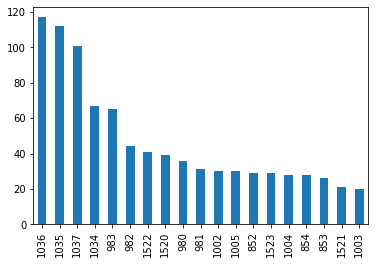

In [ ]:
#Grafico de barras por quantidade de vendas por loja
df["LojaID"].value_counts(ascending=False).plot.bar(); # ; retira a linha de cima

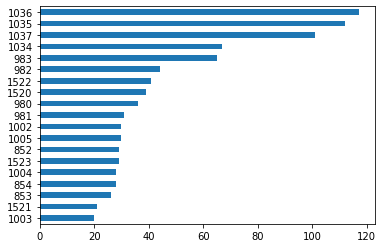

In [ ]:
#Grafico de barras horizontais de vendas por loja
df["LojaID"].value_counts(ascending=True).plot.barh();

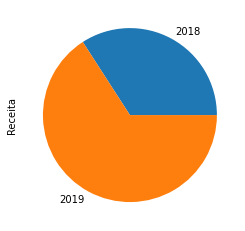

In [ ]:
#Grafico de pizza da receita por ano
df.groupby(df["Ano_venda"])["Receita"].sum().plot.pie();

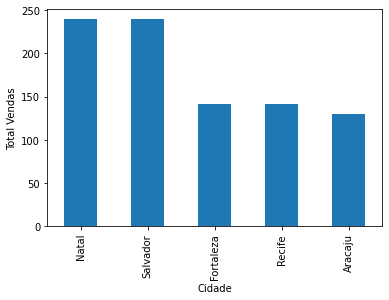

In [ ]:
#Gráfico de vendas por cidade
import matplotlib.pyplot as plt
df["Cidade"].value_counts(ascending=False).plot.bar();
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

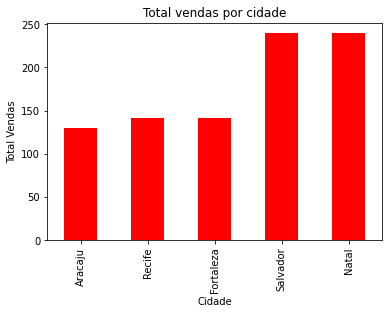

In [ ]:
#Mudando cor e adicionando titulo
df["Cidade"].value_counts(ascending=True).plot.bar(title="Total vendas por cidade",color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando estilo de um gráfico
plt.style.use("ggplot")

In [ ]:
df_2019 = df[df["Ano_venda"] == 2019]

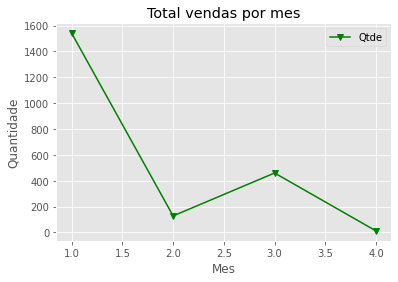

In [ ]:
#Total de produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(title="Total vendas por mes", color="green", marker="v");
plt.xlabel("Mes")
plt.ylabel("Quantidade")
plt.legend();

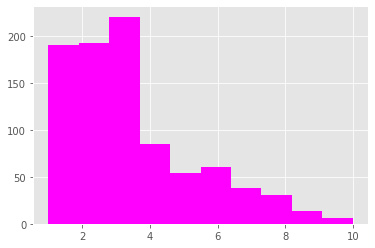

In [ ]:
plt.hist(df["Qtde"], color="Magenta");

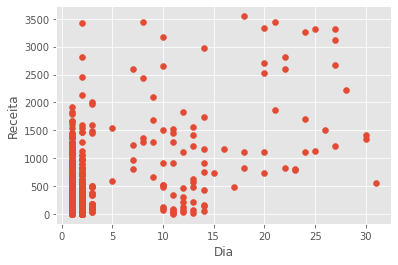

In [ ]:
#Gráfico de dispersão
plt.scatter(x=df["dia_venda"], y=df["Receita"]);
plt.xlabel("Dia")
plt.ylabel("Receita");

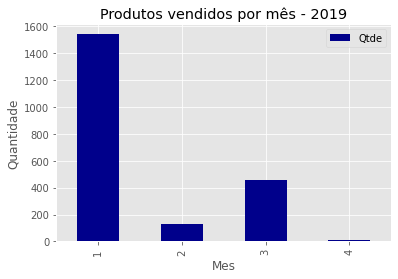

In [ ]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot.bar(title="Produtos vendidos por mês - 2019", color="darkblue")
plt.xlabel("Mes")
plt.ylabel("Quantidade")
plt.legend();
plt.savefig("Grafico qtde por mes.png")